<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Import Needed Libraries</h2>
</div>

In [1]:
import os
import cv2
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import tensorflow as tf 
import keras 
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Reading Dataset And Get Info</h2>
</div>

In [2]:
IMAGE_SIZE = (150,150)

In [3]:
Class_Names = {0:'Delta wing',1:'Biplane',2:'Seaplane',3:'Quadcopter',4:'Helicopter',5:'Swept wing',6:'Passenger plane',7:'Fighter plane',8:'Paraglider'}
print(Class_Names)

{0: 'Delta wing', 1: 'Biplane', 2: 'Seaplane', 3: 'Quadcopter', 4: 'Helicopter', 5: 'Swept wing', 6: 'Passenger plane', 7: 'Fighter plane', 8: 'Paraglider'}


In [4]:
def Load_Train():
    dataset = r'D:\Ahmed\Study\Instant\Private Study Hard\Me\AI Projects\2- Deep Learning\Aircraft Classification - Copy\train'

    Images = []
    Labels = []

    for folder in os.listdir(dataset):
        for file in tqdm(os.listdir(os.path.join(dataset,folder))):
            image_path = os.path.join(os.path.join(dataset,folder),file)
            image = cv2.imread(image_path)
            image = cv2.resize(image , IMAGE_SIZE)
            image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

            Images.append(image)
            Labels.append(int(folder)-1)  # folder names are integers starting from 1
    
    Images = np.array(Images , dtype='float32')
    Labels = np.array(Labels , dtype='int32')

    return (Images , Labels)

Train_Images , Train_Labels = Load_Train()

100%|██████████| 1971/1971 [00:13<00:00, 143.54it/s]


In [5]:
def Load_Test():
    dataset = r'D:\Ahmed\Study\Instant\Private Study Hard\Me\AI Projects\2- Deep Learning\Aircraft Classification - Copy\test'

    Images = []
    Labels = []

    for folder in os.listdir(dataset):
        for file in tqdm(os.listdir(os.path.join(dataset,folder))):
            image_path = os.path.join(os.path.join(dataset,folder),file)
            image = cv2.imread(image_path)
            image = cv2.resize(image , IMAGE_SIZE)
            image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

            Images.append(image)
            Labels.append(int(folder)-1)  # folder names are integers starting from 1
    
    Images = np.array(Images , dtype='float32')
    Labels = np.array(Labels , dtype='int32')

    return (Images , Labels)

Test_Images , Test_Labels = Load_Train()

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 1971/1971 [00:01<00:00, 1031.23it/s]


<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">EDA of Images and Get Insights</h2>
</div>

#### Number of Images

In [10]:
print(f"Number of Training Images {Train_Images.shape[0]}")
print(f"Number of Testing Images {Test_Images.shape[0]}")
print(f"Size of Images {IMAGE_SIZE}")

Number of Training Images 19569
Number of Testing Images 19569
Size of Images (150, 150)


In [11]:
_ , train_counts = np.unique(Train_Labels , return_counts = True)
_ , test_counts = np.unique(Test_Labels , return_counts = True)

df = pd.DataFrame({'Train':train_counts,
              'Test':test_counts},index = Class_Names.values())

In [12]:
# Show Counts of Each Images
df

Train  Test
Delta wing        2000  2000
Biplane           2020  2020
Seaplane          2112  2112
Quadcopter        1968  1968
Helicopter        3160  3160
Swept wing        1968  1968
Passenger plane   2090  2090
Fighter plane     2280  2280
Paraglider        1971  1971

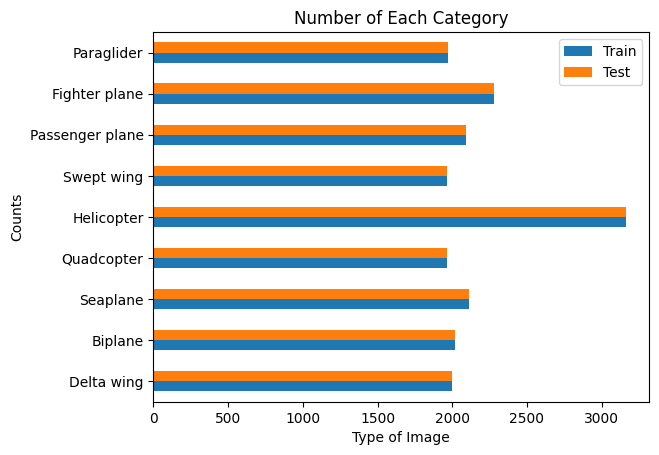

In [13]:
df.plot.barh()
plt.xticks(rotation = 0)
plt.title('Number of Each Category')
plt.ylabel('Counts')
plt.xlabel('Type of Image')
plt.show()

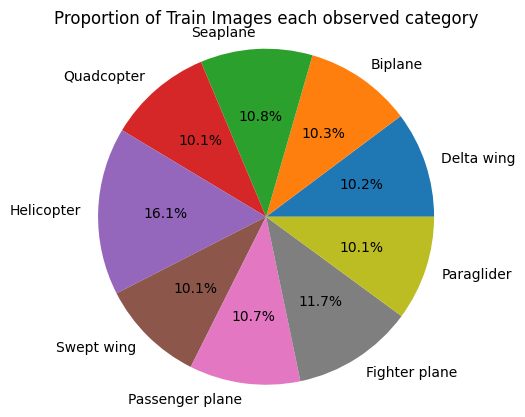

In [14]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0 ,0 ,0 ,0) , 
        labels=Class_Names.values(),
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of Train Images each observed category')
plt.show()

#### Images In Dataset

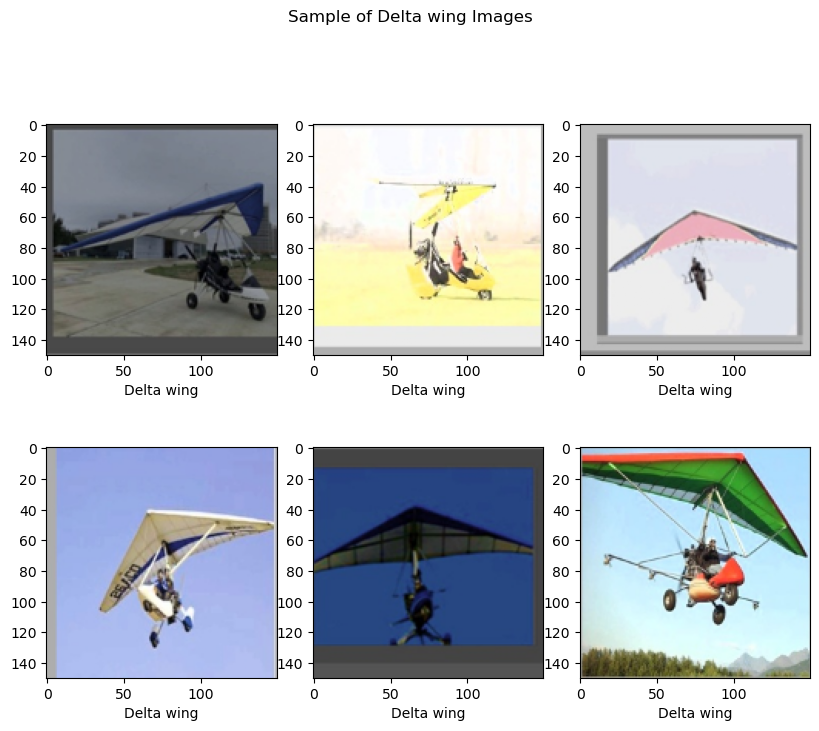

In [6]:
plt.figure(figsize=(8,8))
plt.suptitle(f'Sample of {Class_Names[0]} Images')

for i in range(6):
    plt.subplot(2,3,i+1)
    Category_List = np.where(Train_Labels == 0)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Train_Images[idx] / 255.0)
    plt.xlabel(f'{Class_Names[0]}')
    plt.tight_layout(pad=0 , h_pad=0 , w_pad=0)

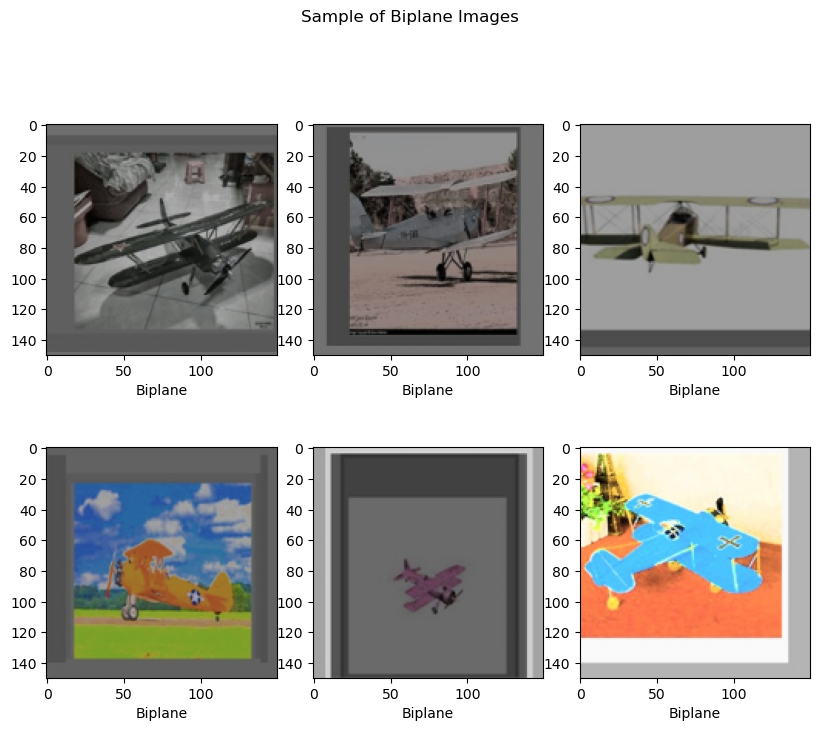

In [7]:
plt.figure(figsize=(8,8))
plt.suptitle(f'Sample of {Class_Names[1]} Images')

for i in range(6):
    plt.subplot(2,3,i+1)
    Category_List = np.where(Train_Labels == 1)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Train_Images[idx] / 255.0)
    plt.xlabel(f'{Class_Names[1]}')
    plt.tight_layout(pad=0 , h_pad=0 , w_pad=0)

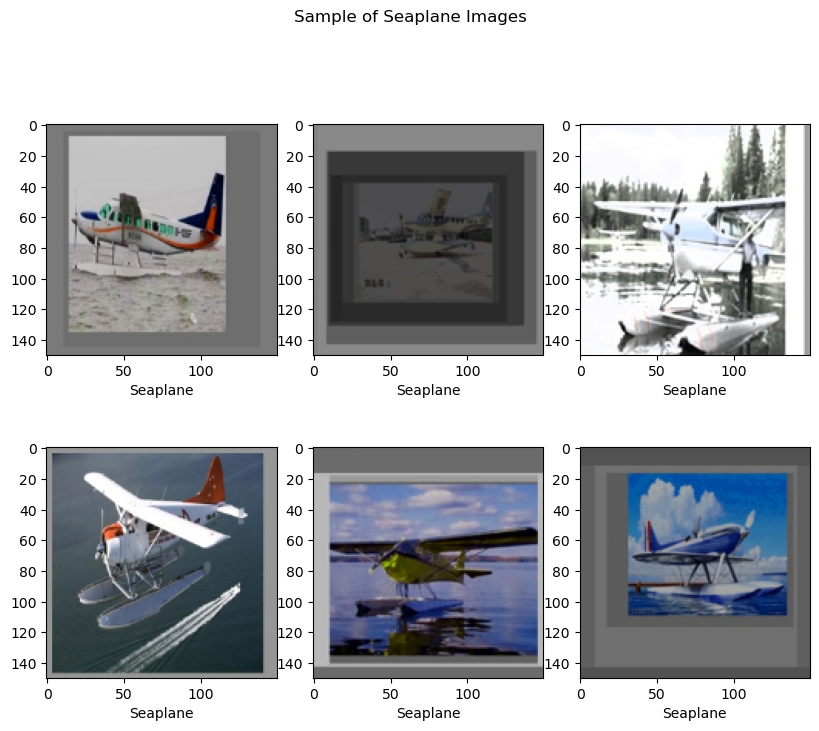

In [8]:
plt.figure(figsize=(8,8))
plt.suptitle(f'Sample of {Class_Names[2]} Images')

for i in range(6):
    plt.subplot(2,3,i+1)
    Category_List = np.where(Train_Labels == 2)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Train_Images[idx] / 255.0)
    plt.xlabel(f'{Class_Names[2]}')
    plt.tight_layout(pad=0 , h_pad=0 , w_pad=0)

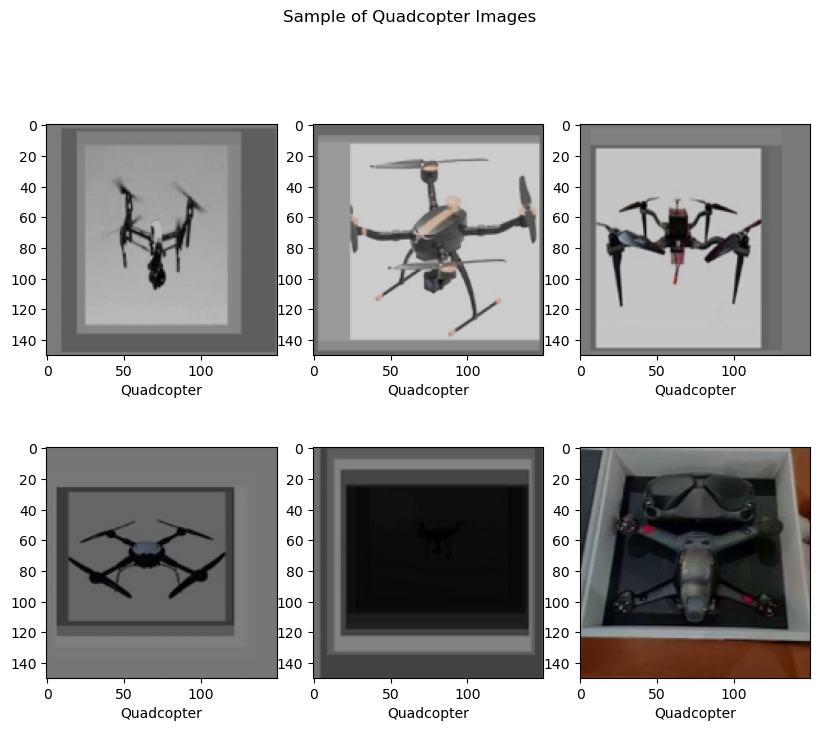

In [9]:
plt.figure(figsize=(8,8))
plt.suptitle(f'Sample of {Class_Names[3]} Images')

for i in range(6):
    plt.subplot(2,3,i+1)
    Category_List = np.where(Train_Labels == 3)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Train_Images[idx] / 255.0)
    plt.xlabel(f'{Class_Names[3]}')
    plt.tight_layout(pad=0 , h_pad=0 , w_pad=0)

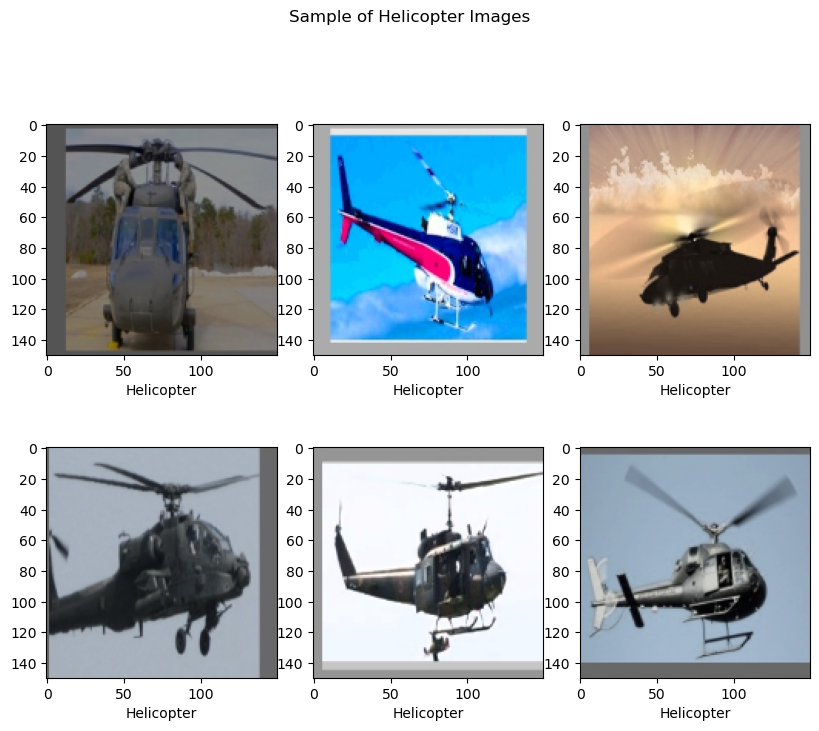

In [10]:
plt.figure(figsize=(8,8))
plt.suptitle(f'Sample of {Class_Names[4]} Images')

for i in range(6):
    plt.subplot(2,3,i+1)
    Category_List = np.where(Train_Labels == 4)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Train_Images[idx] / 255.0)
    plt.xlabel(f'{Class_Names[4]}')
    plt.tight_layout(pad=0 , h_pad=0 , w_pad=0)

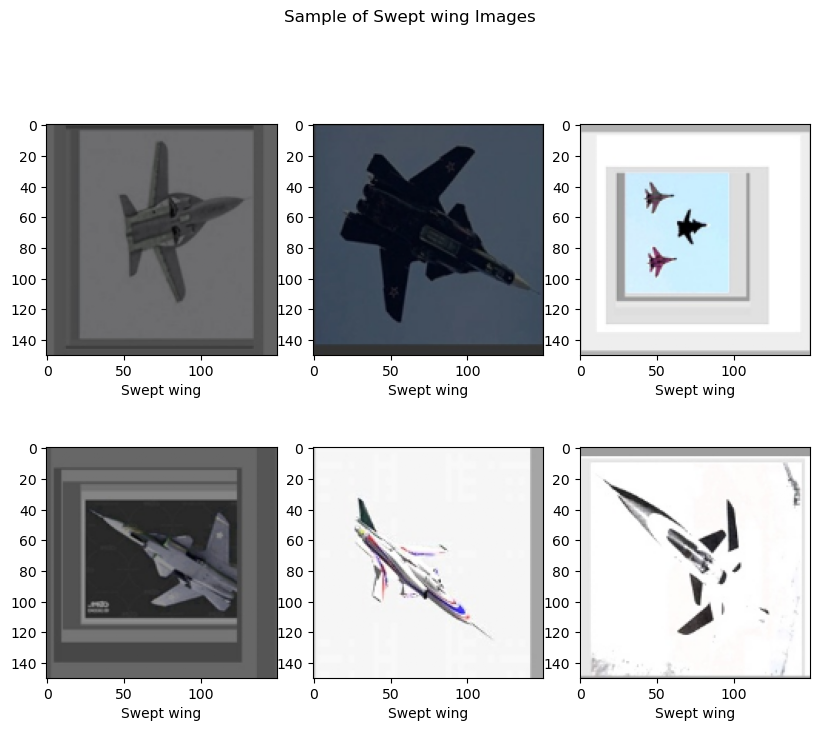

In [11]:
plt.figure(figsize=(8,8))
plt.suptitle(f'Sample of {Class_Names[5]} Images')

for i in range(6):
    plt.subplot(2,3,i+1)
    Category_List = np.where(Train_Labels == 5)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Train_Images[idx] / 255.0)
    plt.xlabel(f'{Class_Names[5]}')
    plt.tight_layout(pad=0 , h_pad=0 , w_pad=0)

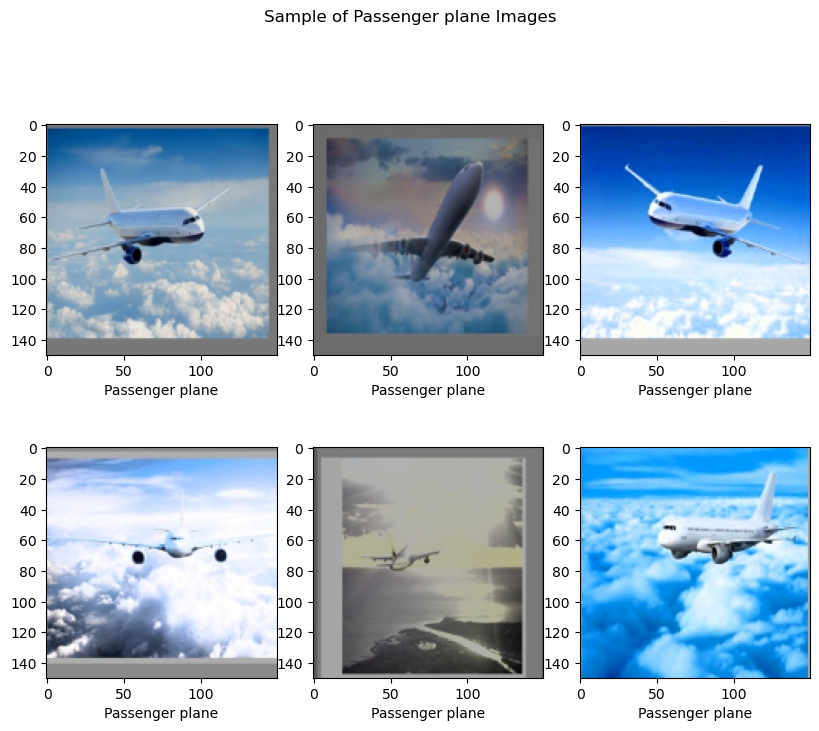

In [12]:
plt.figure(figsize=(8,8))
plt.suptitle(f'Sample of {Class_Names[6]} Images')

for i in range(6):
    plt.subplot(2,3,i+1)
    Category_List = np.where(Train_Labels == 6)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Train_Images[idx] / 255.0)
    plt.xlabel(f'{Class_Names[6]}')
    plt.tight_layout(pad=0 , h_pad=0 , w_pad=0)

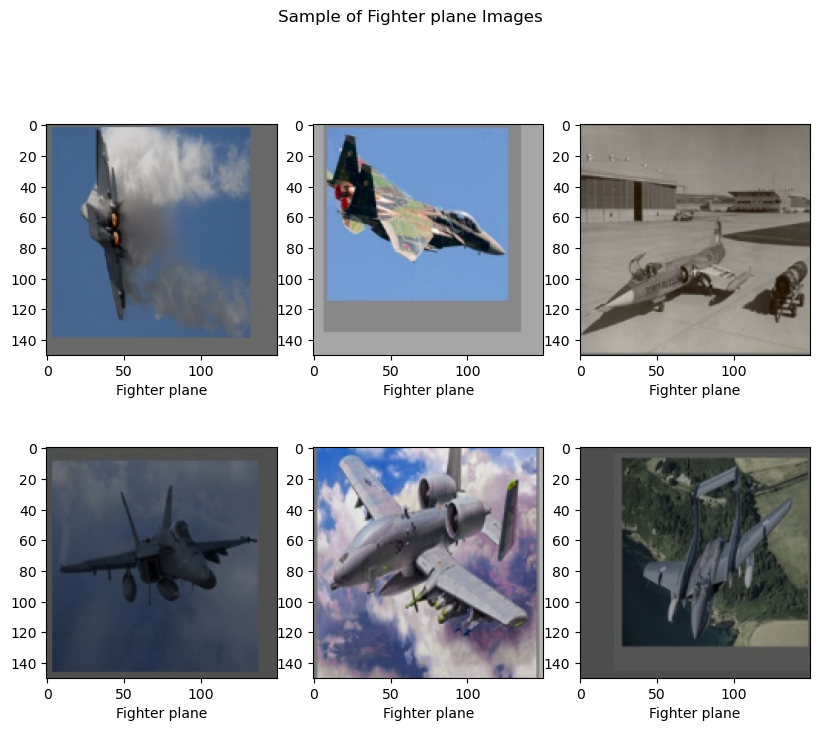

In [13]:
plt.figure(figsize=(8,8))
plt.suptitle(f'Sample of {Class_Names[7]} Images')

for i in range(6):
    plt.subplot(2,3,i+1)
    Category_List = np.where(Train_Labels == 7)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Train_Images[idx] / 255.0)
    plt.xlabel(f'{Class_Names[7]}')
    plt.tight_layout(pad=0 , h_pad=0 , w_pad=0)

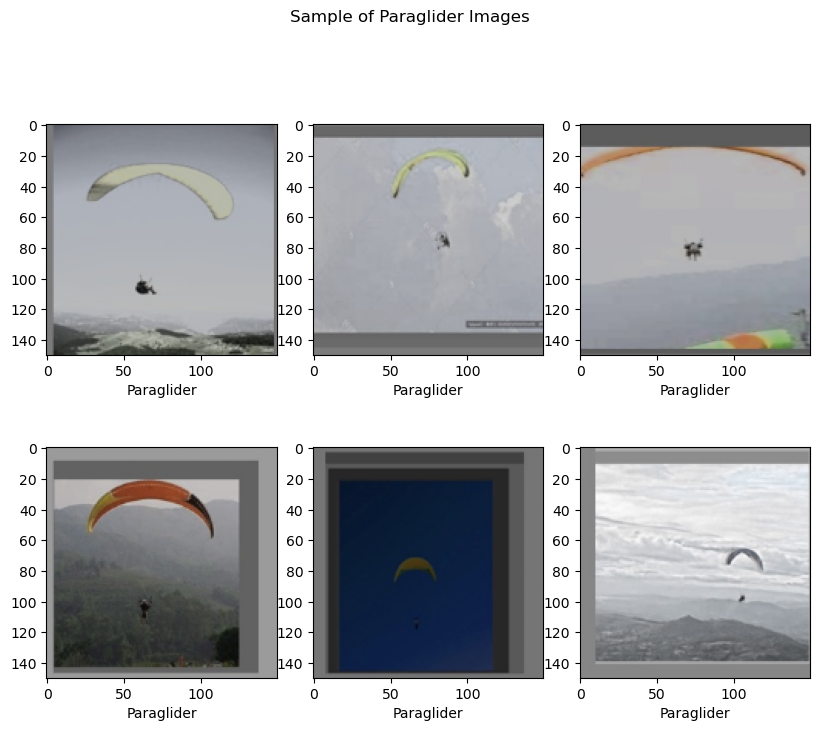

In [14]:
plt.figure(figsize=(8,8))
plt.suptitle(f'Sample of {Class_Names[8]} Images')

for i in range(6):
    plt.subplot(2,3,i+1)
    Category_List = np.where(Train_Labels == 8)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Train_Images[idx] / 255.0)
    plt.xlabel(f'{Class_Names[8]}')
    plt.tight_layout(pad=0 , h_pad=0 , w_pad=0)

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Modeling</h2>
</div>

In [15]:
train_images , val_images , train_labels , val_labels = train_test_split(Train_Images , Train_Labels , test_size=0.2 , random_state=42 , shuffle=True)

In [16]:
print(f"Train Image Shape: {train_images.shape}")
print(f"Validation Image Shape: {val_images.shape}")
print(f"Train Label Shape: {train_labels.shape}")
print(f"Validation Label Shape: {val_labels.shape}")
print(f"Test Image Shape: {Test_Images.shape}")
print(f"Test Label Shape: {Test_Labels.shape}")

Train Image Shape: (15655, 150, 150, 3)
Validation Image Shape: (3914, 150, 150, 3)
Train Label Shape: (15655,)
Validation Label Shape: (3914,)
Test Image Shape: (19569, 150, 150, 3)
Test Label Shape: (19569,)


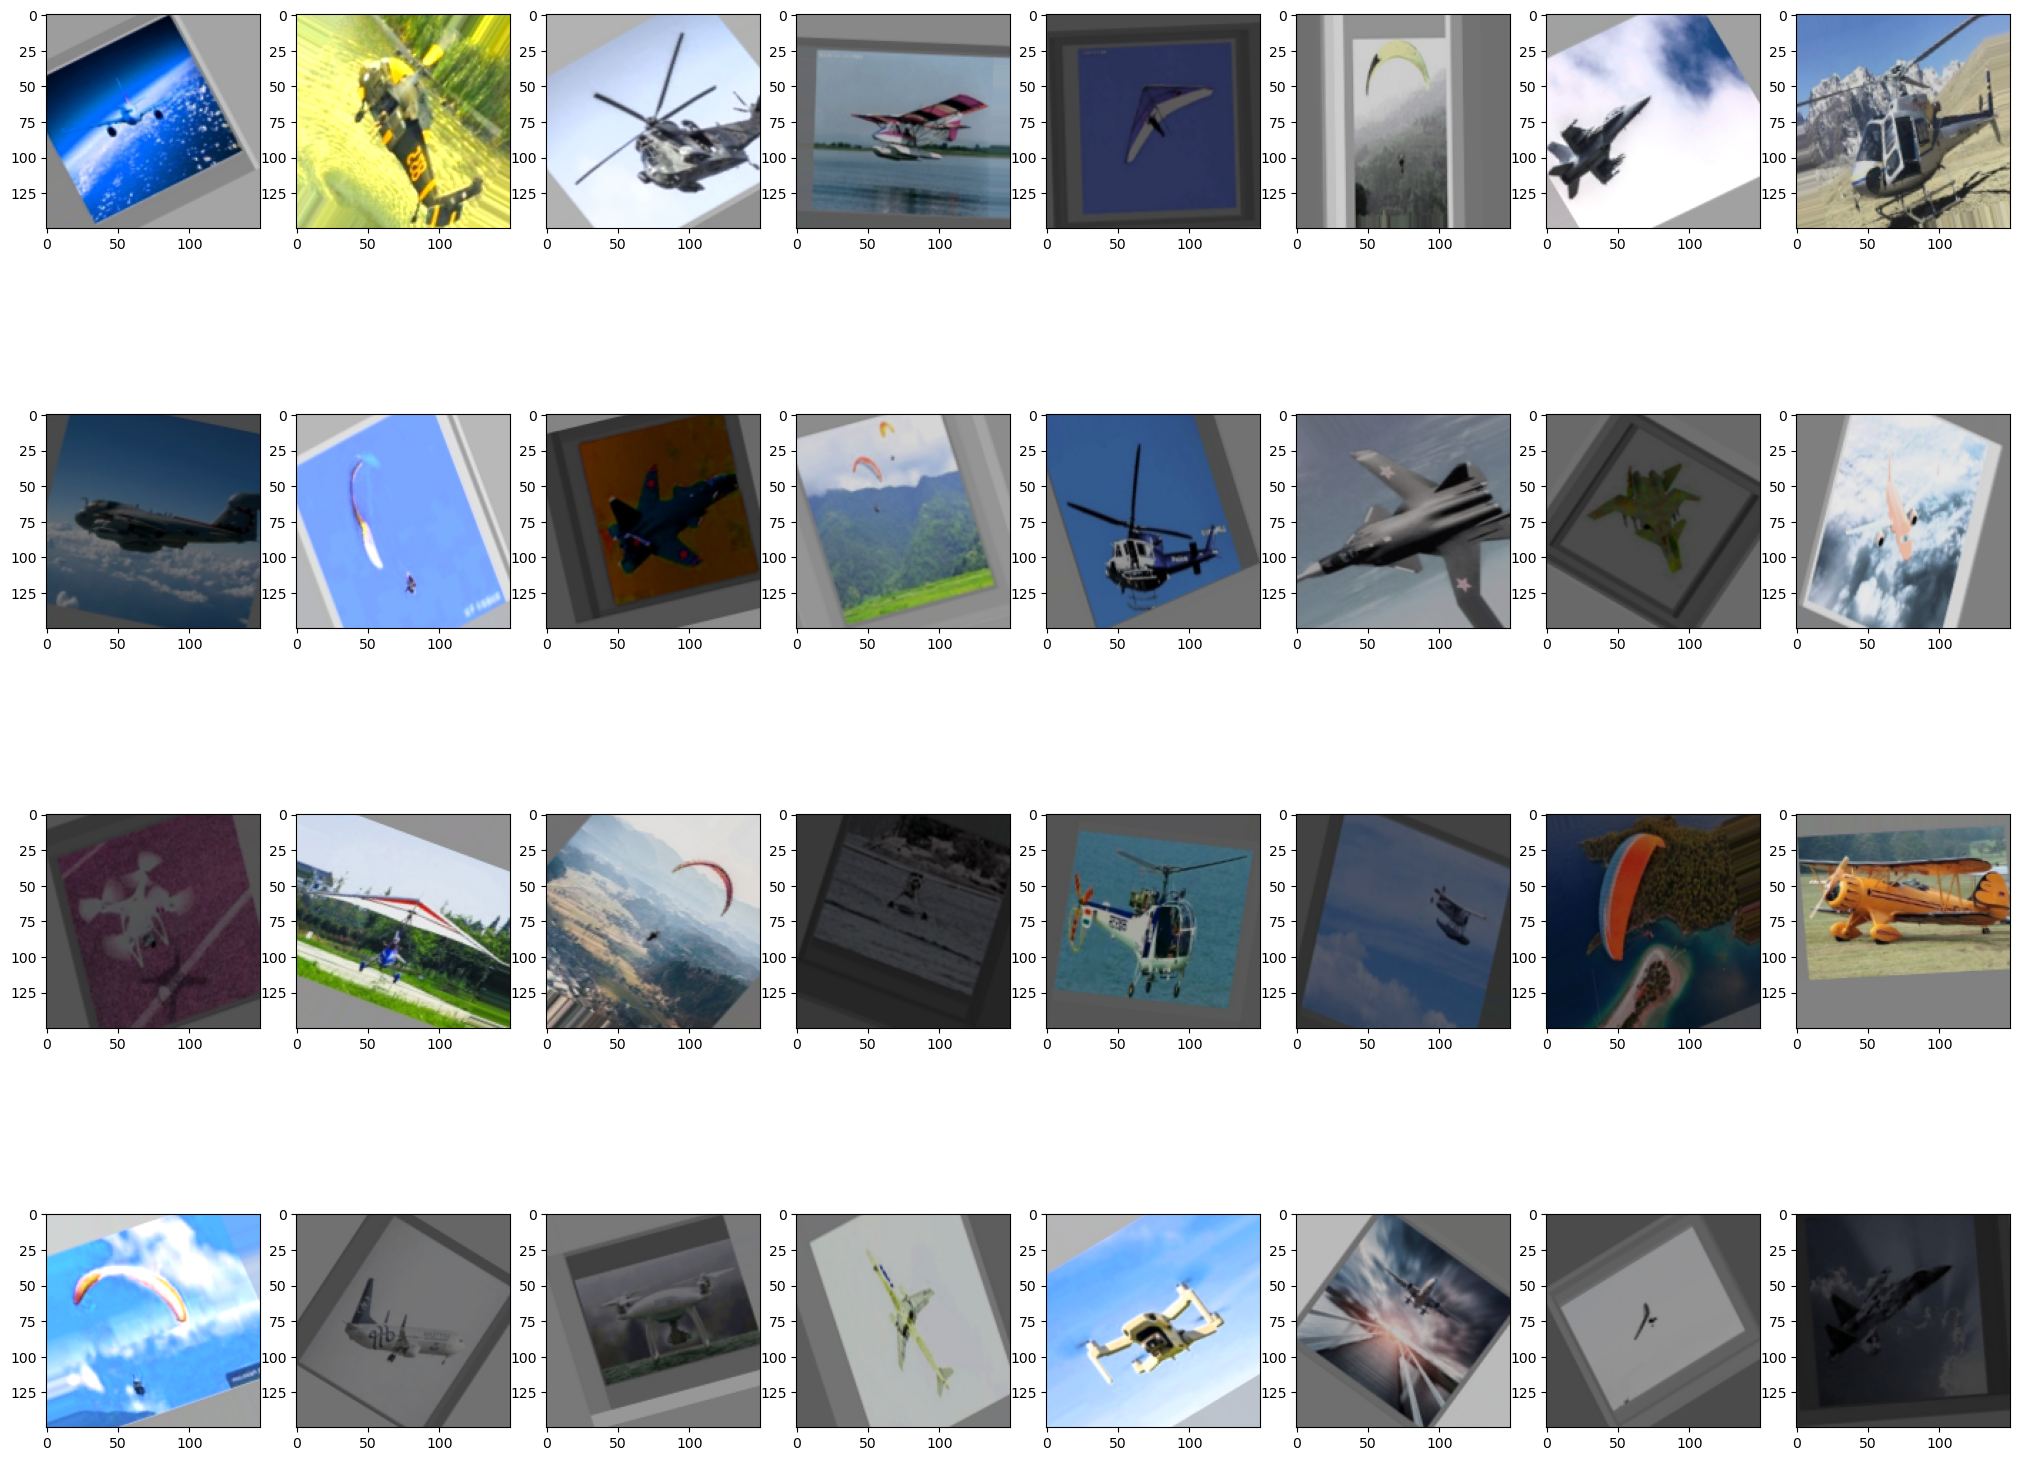

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 40,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                brightness_range = [0.8, 1.2], 
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(x=train_images,
    y=train_labels,
    batch_size=128,
    shuffle=True,   
)

val_generator = val_datagen.flow(x=val_images,
    y=val_labels,
    batch_size=128,
    shuffle=True,
)

test_generator = test_datagen.flow(x=Test_Images,
    y=Test_Labels,
    batch_size=128,
    shuffle=False,
)



for x , y in train_generator:
    plt.figure(figsize=(20,20))
    for i in range(32):
        plt.subplot(4,8,i+1)
        plt.imshow(x[i])
        plt.tight_layout(pad=0 , h_pad=0 , w_pad=0)
    break

In [27]:
KerasModel = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(9, activation='softmax')
])

I0000 00:00:1752771766.670141      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752771766.670807      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [28]:
KerasModel.compile(optimizer=Adam(learning_rate=0.001),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [29]:
best_model_callback = keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
history = KerasModel.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        best_model_callback
    ])

Epoch 1/50


I0000 00:00:1752771772.385606     103 service.cc:148] XLA service 0x78bf14007550 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752771772.386514     103 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752771772.386540     103 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752771772.737725     103 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-07-17 17:03:03.436509: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,32,150,150]{3,2,1,0}, f32[128,32,150,150]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_

  1/123 ━━━━━━━━━━━━━━━━━━━━ 37:36 18s/step - accuracy: 0.1406 - loss: 2.1911

I0000 00:00:1752771787.590530     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


123/123 ━━━━━━━━━━━━━━━━━━━━ 117s 810ms/step - accuracy: 0.1968 - loss: 2.3797 - val_accuracy: 0.3891 - val_loss: 1.6970
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 90s 729ms/step - accuracy: 0.3850 - loss: 1.6936 - val_accuracy: 0.4742 - val_loss: 1.5043
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 90s 730ms/step - accuracy: 0.4522 - loss: 1.5365 - val_accuracy: 0.5519 - val_loss: 1.2837
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 90s 731ms/step - accuracy: 0.5252 - loss: 1.3581 - val_accuracy: 0.5818 - val_loss: 1.2023
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 91s 737ms/step - accuracy: 0.5641 - loss: 1.2568 - val_accuracy: 0.6354 - val_loss: 1.0591
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 89s 722ms/step - accuracy: 0.5975 - loss: 1.1678 - val_accuracy: 0.6691 - val_loss: 0.9798
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 89s 723ms/step - accuracy: 0.6215 - loss: 1.0631 - val_accuracy: 0.6995 - val_loss: 0.8893
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 91s 736ms/step - accuracy: 0.6468 - loss: 1.0052 - va

#### Summary of KerasModel

In [30]:
print(KerasModel.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    21,234,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,023,869 (244.23 MB)

 Trainable params: 21,341,289 (81.41 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 42,682,580 (162.82 MB)

None


<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Evaluating</h2>
</div>

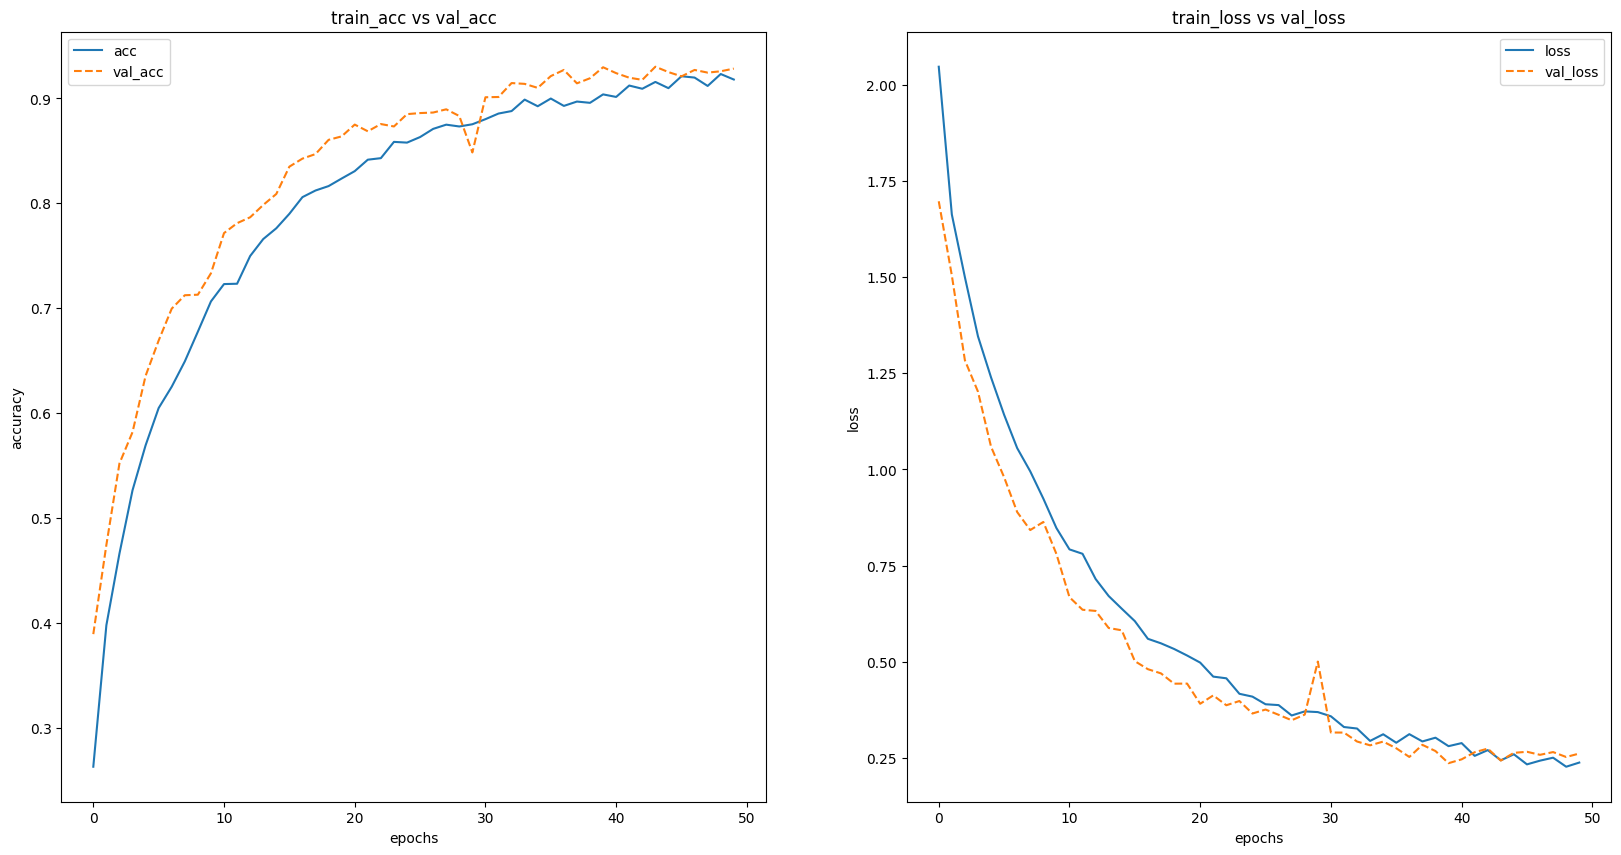

In [31]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(20,10))

    # Plot accuracy
    plt.subplot(121)
    plt.plot(history.history['accuracy'],'-', label = "acc")
    plt.plot(history.history['val_accuracy'], '--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(122)
    plt.plot(history.history['loss'],'-', label = "loss")
    plt.plot(history.history['val_loss'], '--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()
plot_accuracy_loss(history)    

In [ ]:
model = keras.models.load_model('best_model.h5')
predictions = model.predict(test_generator)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

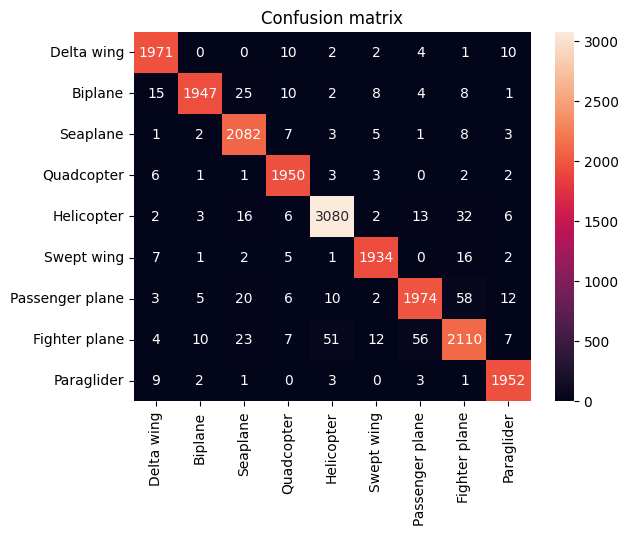

In [33]:
CM = confusion_matrix(Test_Labels, pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels = Class_Names.values(), 
           yticklabels = Class_Names.values(),
           ax = ax,           
           fmt='d')
ax.set_title('Confusion matrix')
plt.show()

In [34]:
print(classification_report(Test_Labels, pred_labels,target_names = Class_Names.values()))

                 precision    recall  f1-score   support

     Delta wing       0.98      0.99      0.98      2000
        Biplane       0.99      0.96      0.98      2020
       Seaplane       0.96      0.99      0.97      2112
     Quadcopter       0.97      0.99      0.98      1968
     Helicopter       0.98      0.97      0.98      3160
     Swept wing       0.98      0.98      0.98      1968
Passenger plane       0.96      0.94      0.95      2090
  Fighter plane       0.94      0.93      0.93      2280
     Paraglider       0.98      0.99      0.98      1971

       accuracy                           0.97     19569
      macro avg       0.97      0.97      0.97     19569
   weighted avg       0.97      0.97      0.97     19569



<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Predicting</h2>
</div>

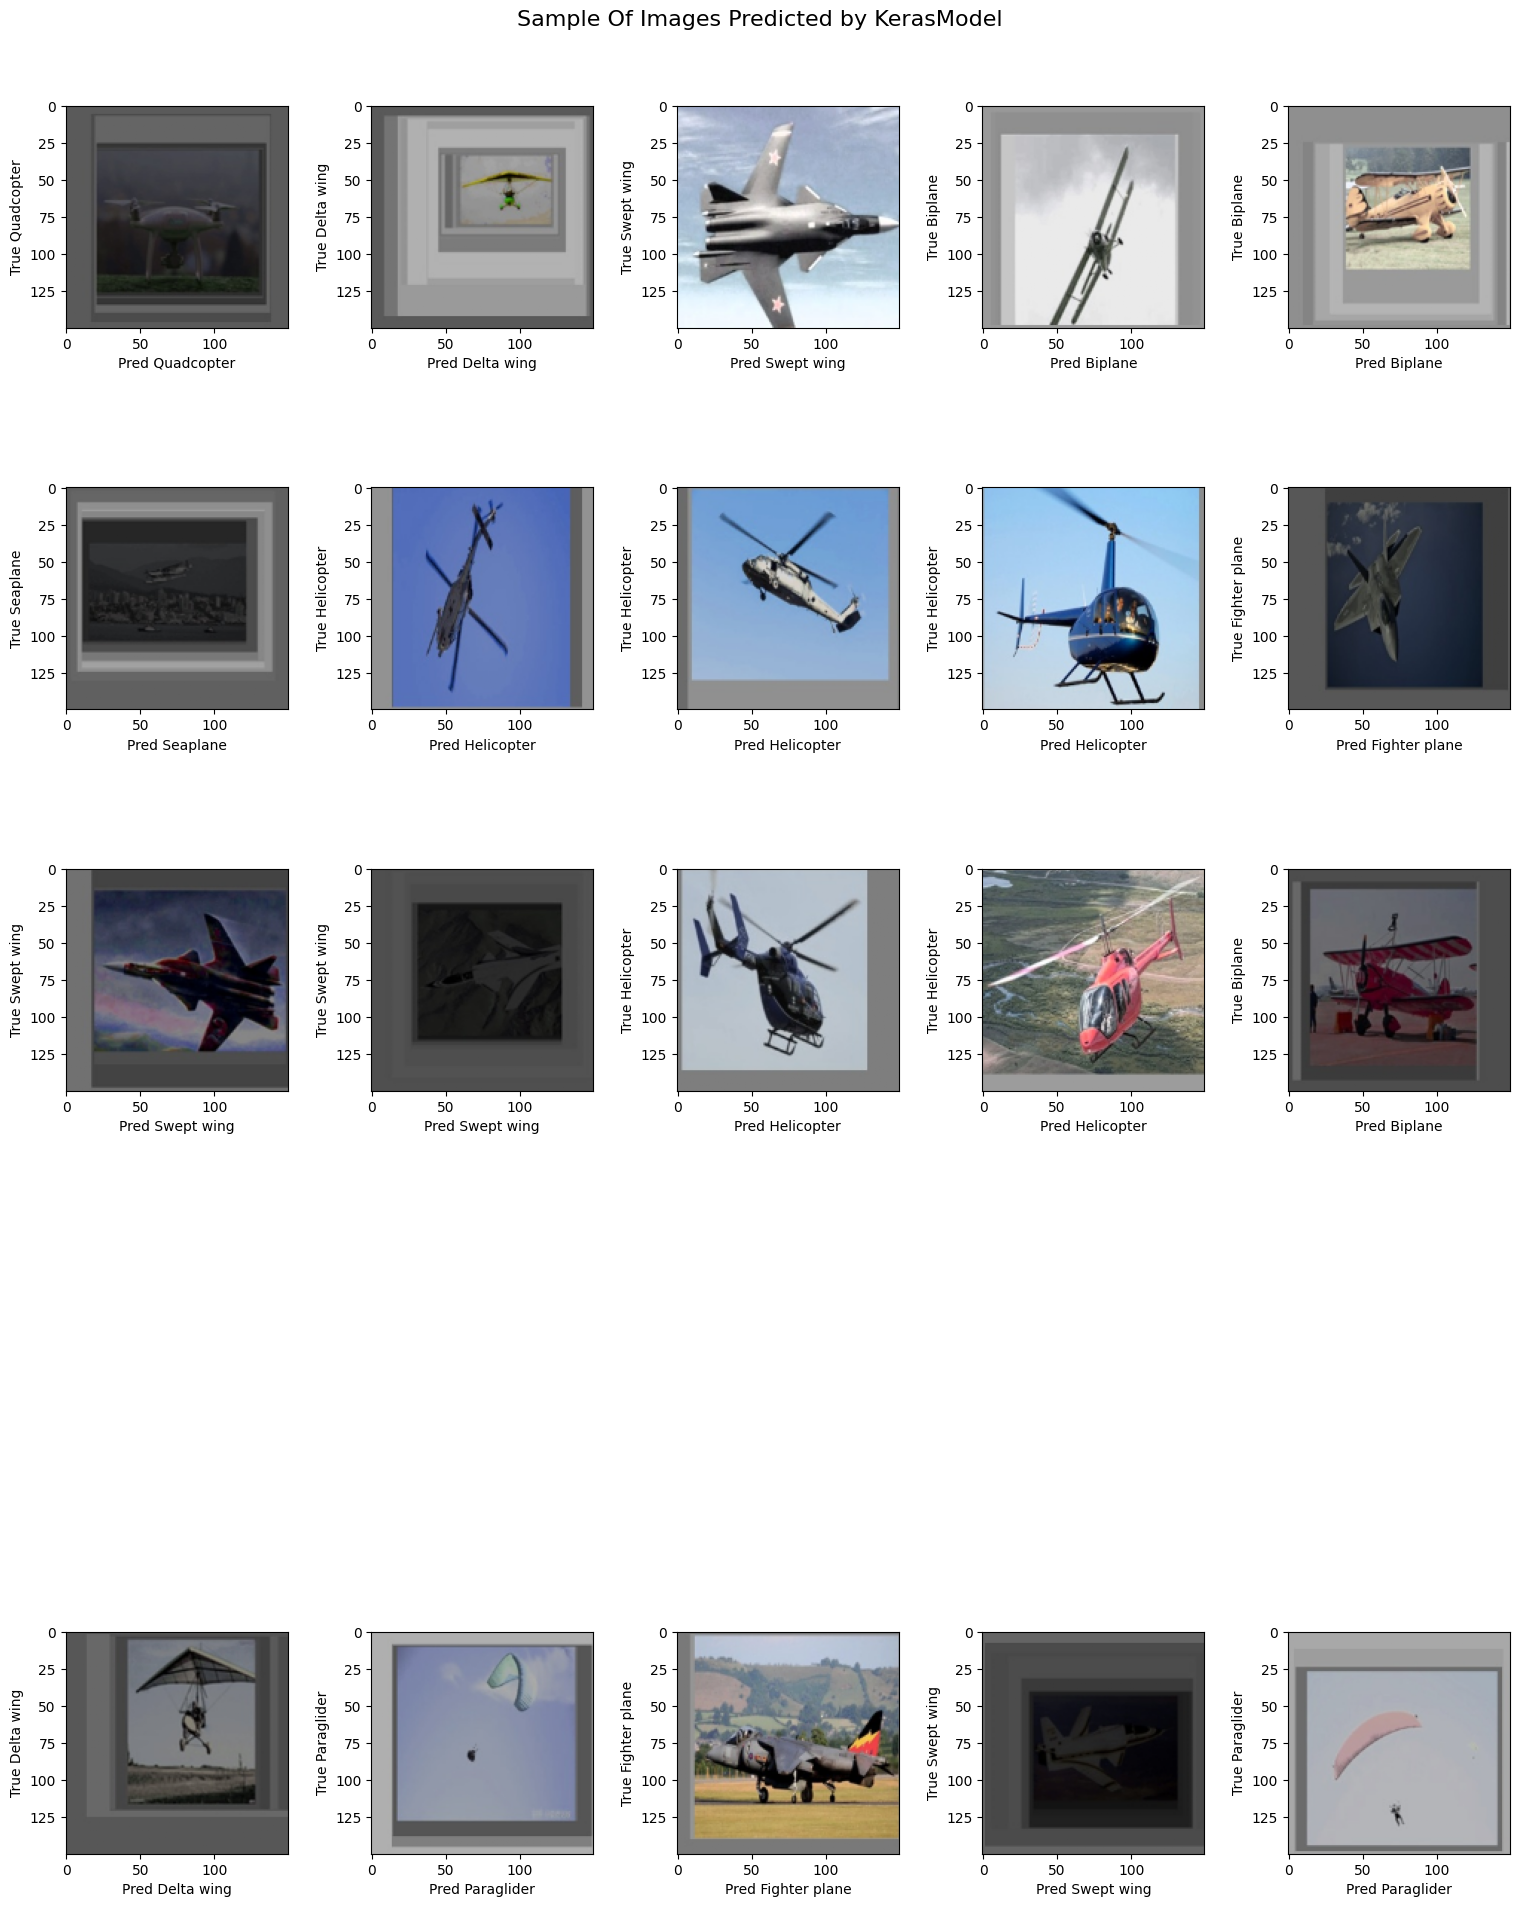

In [35]:
plt.figure(figsize=(15,20))
plt.suptitle(f"Sample Of Images Predicted by KerasModel" , fontsize=16)

for i in range(25):
    plt.subplot(5,5,i+1)
    idx = np.random.choice(np.arange(len(pred_labels)))
    plt.imshow(Test_Images[idx] / 255.0)
    plt.xlabel(f'Pred {Class_Names[pred_labels[idx]]}')
    plt.ylabel(f'True {Class_Names[Test_Labels[idx]]}')
    plt.tight_layout(pad=0 , h_pad=0 , w_pad=2)